In [2]:
# import csv
import seaborn as sns
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

import PIL
import cv2

import read_datasets as rd
from importlib import reload
reload(rd)

<module 'read_datasets' from '/home/xiaoyuz1/amazon_turk/read_datasets.py'>

In [ ]:
# QuickDraw
'''
! /home/xiaoyuz1/google-cloud-sdk/bin/gsutil -m cp 'gs://quickdraw_dataset/full/simplified/cat.ndjson' .
! mkdir quickdraw
! mv cat.ndjson quickdraw
! cd quickdraw
! cat cat.ndjson | head -n 5
! cat cat.ndjson | ndjson-filter 'd.recognized == true' | wc -l
! cat cat.ndjson | ndjson-filter 'd.recognized == true' | ndjson-reduce > cat_recognized.json
'''
json_folder = '/raid/xiaoyuz1/quickdraw'
json_file_prefix = 'cat_recognized'
with open(os.path.join(json_folder, '{}.json'.format(json_file_prefix)), 'r') as j:
     contents = json.loads(j.read())

category_folder = os.path.join(json_folder, 'cat')
if not os.path.exists(category_folder):
    os.mkdir(category_folder)

In [ ]:
for drawing_idx, drawing_json in enumerate(contents):
    png_path = os.path.join(category_folder, '{}.png'.format(drawing_idx))
    
    drawing = drawing_json['drawing']
    abspoints, stroke_group = rd.quickdraw2abspoints(drawing)
    print(np.asarray(abspoints).shape)
    image_data = rd.to_pngs(abspoints, stroke_group, output_dim=(256,256))
    cv2.imwrite(png_path, image_data)

In [ ]:
animal_categories = ['bat', ' bear', ' bee', ' bird', ' butterfly', ' camel', \
 ' cat', ' cow', ' crab', ' crocodile', ' dog', \
 ' dophin', ' dragon', ' duck', ' elephant', ' face', \
 ' fish', ' flamingo', ' frog', ' giraffe', ' horse', \
 ' kangaroo', ' lion', ' lobster', ' monkey', ' mosquito', \
 ' mouse', ' octopus', ' owl', ' panda', ' parrot', ' penguin', \
 ' pig', ' rabbit', ' raccoon', ' rhinoceros', ' scorpion', \
 ' sea turtle', ' shark', ' sheep', ' smiley face', ' snail', \
 ' snake', ' snowman', ' spider', ' squirrel', ' swan', \
 ' teddy-bear', ' mona-lisa', ' tiger', ' whale', ' zebra']
animal_categories = [c.strip() for c in animal_categories]
for c in animal_categories:
    print(c)

In [ ]:
# SPG point-based format to SVG 256x256 images (Bulk)

from tqdm import tqdm

for file in os.listdir('/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping'):
    if not file.endswith(".ndjson"):
        continue 
    
    file_name = os.path.join('/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping', file)
    obj = json.load(open(file_name, 'r'))
    category_name = file.split(".n")[0]
    folder = '/raid/xiaoyuz1/sketch_datasets/spg'

    category_folder = os.path.join(folder, category_name)
    print(category_folder)
    if not os.path.exists(category_folder):
        os.mkdir(category_folder)

    for idx, drawing_raw in tqdm(enumerate(obj['train_data']), total=len(obj['train_data'])):
        png_path = os.path.join(category_folder, '{}.png'.format(idx))
        image_data = rd.transform_spg_2_svg_png(drawing_raw)
        cv2.imwrite(png_path, image_data)

In [34]:
# Processing SPG categories

group_id_fdr = "/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Group ID"
csv_file = open("/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Group ID/all_part_label.csv", "w+")
for file in os.listdir(group_id_fdr):
    if not file.endswith(".txt"):
        continue 
    
    with open(os.path.join(group_id_fdr, file), 'r') as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        cvs_line = "{}\t".format(file.split(".")[0])
        cvs_line += "\t".join(lines)
        cvs_line += "\n"
        csv_file.write(cvs_line)

csv_file.close()

In [3]:
# SPG point-based format to SVG 256x256 images (Individual category)

import ujson as json
import pandas as pd

category_name = "angel"
obj = json.load(open(
    '/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping/{}.ndjson'.format(category_name), 
    'r'))
folder = '/raid/xiaoyuz1/sketch_datasets/spg'


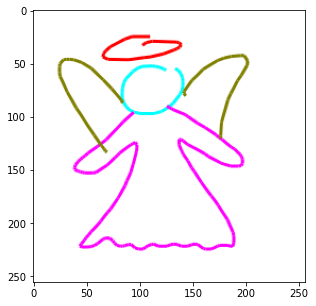

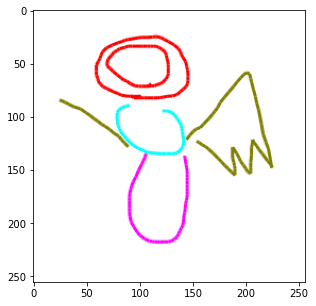

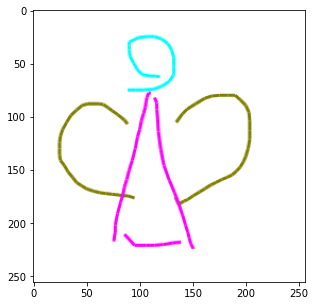

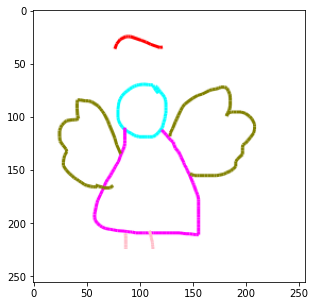

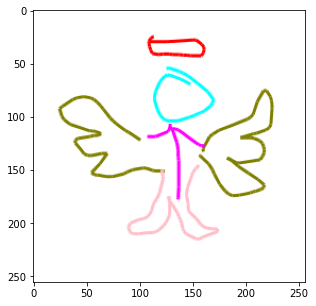

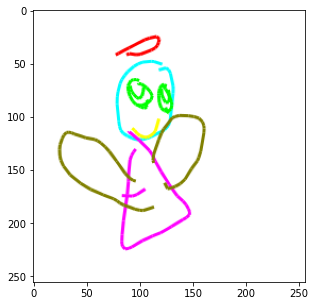

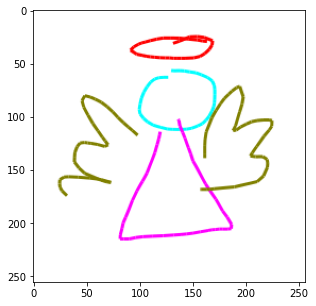

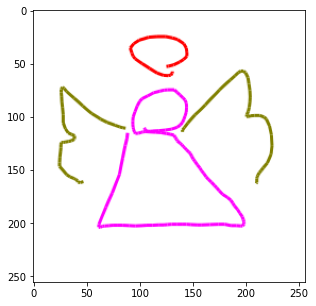

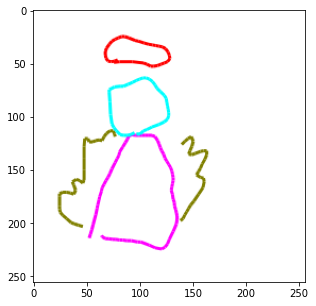

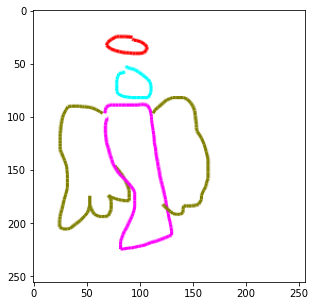

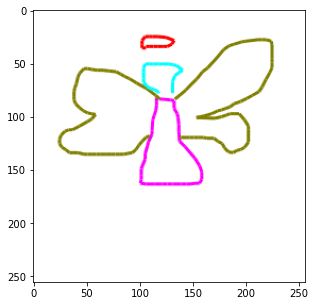

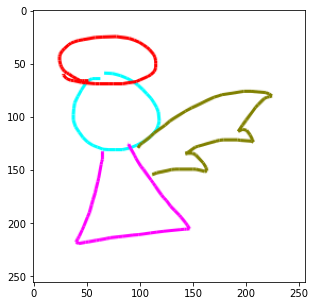

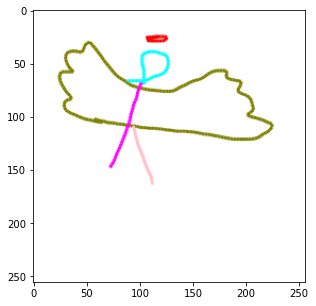

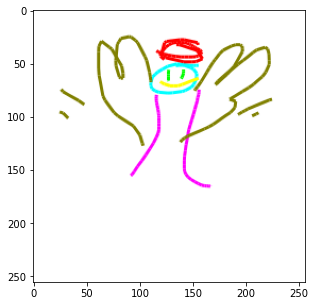

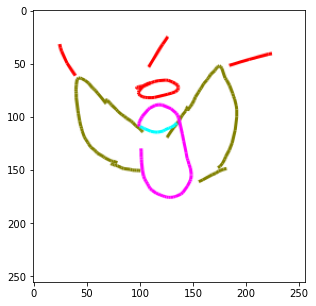

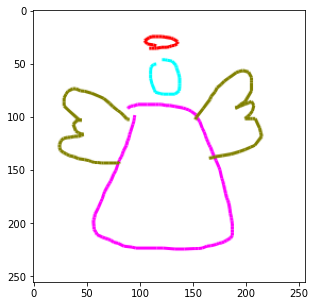

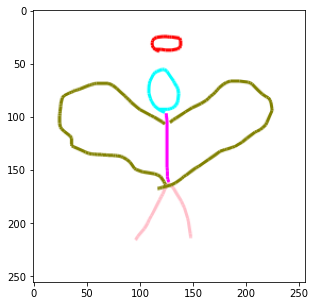

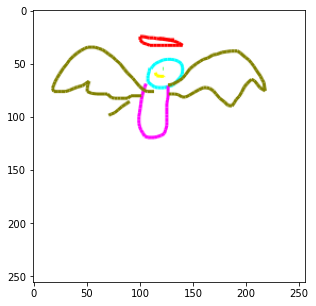

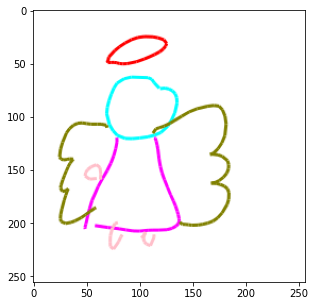

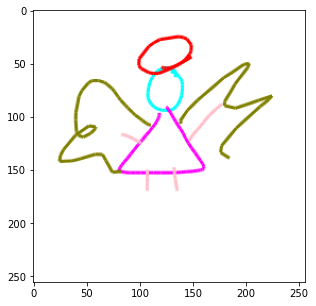

b'W3siUXR5cGUiOiAiaW1nLXNrZXRjaCIsICJRdWVzdGlvbiI6ICJhbmdlbCIsICJTdXBwb3J0aW5nIjogW3siNyI6IFtbWzE0My44MTE4ODExODgxMTg4LCAxNDEuODMxNjgzMTY4MzE2ODMsIDE0Mi4yMjc3MjI3NzIyNzcyMiwgMTQ5Ljc1MjQ3NTI0NzUyNDczLCAxNjAuMDQ5NTA0OTUwNDk1MDIsIDE3My41MTQ4NTE0ODUxNDg0OCwgMTc5Ljg1MTQ4NTE0ODUxNDgzLCAxODYuNTg0MTU4NDE1ODQxNTYsIDE5NS42OTMwNjkzMDY5MzA2OCwgMTk4Ljg2MTM4NjEzODYxMzg1LCAyMDIuMDI5NzAyOTcwMjk3MDIsIDIwMS42MzM2NjMzNjYzMzY2MywgMTk2LjA4OTEwODkxMDg5MTA3LCAxOTIuNTI0NzUyNDc1MjQ3NSwgMTg2LjE4ODExODgxMTg4MTE3LCAxODMuNDE1ODQxNTg0MTU4NCwgMTc3LjQ3NTI0NzUyNDc1MjUsIDE3Ni42ODMxNjgzMTY4MzE2NSwgMTc2LjY4MzE2ODMxNjgzMTY1XSwgWzgwLjg0MTU4NDE1ODQxNTgzLCA3OC40NjUzNDY1MzQ2NTM0NSwgNzYuNDg1MTQ4NTE0ODUxNDcsIDY2LjE4ODExODgxMTg4MTE3LCA1NS44OTEwODkxMDg5MTA4NywgNDcuNTc0MjU3NDI1NzQyNTUsIDQ1LjE5ODAxOTgwMTk4MDE3LCA0My42MTM4NjEzODYxMzg1OTUsIDQyLjgyMTc4MjE3ODIxNzgsIDQyLjgyMTc4MjE3ODIxNzgsIDQ3Ljk3MDI5NzAyOTcwMjk1LCA1MS45MzA2OTMwNjkzMDY5MSwgNjEuNDM1NjQzNTY0MzU2NDIsIDY2LjU4NDE1ODQxNTg0MTU2LCA3OC40NjUzNDY1MzQ2NTM0MywgODQuODAxOTgwMTk4MDE5Nz

In [7]:

# category_folder = os.path.join(folder, category_name)
# if not os.path.exists(category_folder):
#     os.mkdir(category_folder)

# for idx, drawing_raw in enumerate(obj['train_data']):
    
#     if idx > 10:
#         break
reload(rd)
import base64
import json

data = []

def get_web_data(idx_pair):    
    supporting = []
    for idx in idx_pair:

        drawing_raw = obj['train_data'][idx]
        absolute_coord = rd.to_absolute(drawing_raw)
        fig = plt.figure(figsize=(5,5))
        image_data = rd.transform_spg_2_svg_png(drawing_raw, draw_color=True, stroke_width = 3)
        plt.imshow(image_data)
        plt.show()
        
#         stroke5 = rd.absolutedata2stroke5(absolute_coord, label_selected=pred_idxs)
#         image_data_other = rd.transform_5_stroke_2_svg_png(stroke5)
#         plt.figure(figsize=(5,5))
#         plt.imshow(image_data_other)
        
        drawing_dict = {}
        for l in [7]:#np.unique(np.asarray(absolute_coord)[:,-1]):
            stroke3_selected = rd.select_absolutedata(absolute_coord, label_selected=[l])
            stroke3_selected_split = rd.split_into_individual_strokes(stroke3_selected)
            # print(l, stroke3_selected_split, len(stroke3_selected_split))
            drawing_dict[int(l)] = stroke3_selected_split
        supporting.append(drawing_dict)


    data_dict = {
        "Qtype" : "img-sketch",
        "Question" : "angel",
        "Supporting" : supporting,
        "PartsToAnnotate" : [[7, "angel wings", "The body in Sketch 1 is a rectangle that is roughly the same width as the head. The body in Sketch 2 is roughly a rectangle slightly tapered at the top."]],
    }
    return data_dict

data = [get_web_data(list(range(20)))]
y = json.dumps(data)
dataBytes = y.encode("utf-8")
encoded = base64.b64encode(dataBytes)
print(encoded)


# drawing_raw = obj['train_data'][198]
# fig = plt.figure(figsize=(5,5))
# # png_path = os.path.join(category_folder, '{}.png'.format(idx))
# image_data = rd.transform_spg_2_svg_png(drawing_raw, draw_color=True, stroke_width = 3)
# print(image_data.shape)
# plt.imshow(image_data)
# plt.show()

In [46]:
base64

2

In [ ]:
# for i in range(800):
#     print(np.unique(np.asarray(obj['train_data'][i])[:,-1]))

In [ ]:
fig = plt.figure(figsize=(5,5))
img = PIL.Image.open('/raid/xiaoyuz1/sketch_datasets/spg/angel/5.png')
# img = PIL.Image.open('/raid/xiaoyuz1/sketch_datasets/QuickDraw/picture_files/train/cat/cat_1028.png')
# img = PIL.Image.open('/raid/xiaoyuz1/sketch_datasets/QuickDraw/picture_files/train/bear/bear_1028.png')

# data = zip(img.getdata(), img.getdata(), img.getdata())
# w, h = img.size
# ima = PIL.Image.new('RGB', (w,h))
# ima.putdata(list(data))

img = img.convert(mode='RGB')
print(img.size)
plt.imshow(img)
plt.show()

In [ ]:
all_categories = open('/raid/xiaoyuz1/sketch_datasets/categories.txt').readlines()
all_categories = [line.strip() for line in all_categories]

In [ ]:
categories = os.listdir('/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping')
categories = os.listdir("/raid/xiaoyuz1/sketch_datasets/TU_Berlin/svg")
categories = [cat.split(".")[0] for cat in categories]
categories = [cat.replace("_", " ") for cat in categories]
categories = np.sort(categories)

(800, 800)


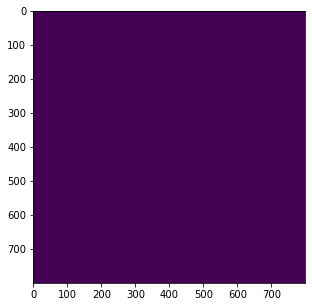

In [19]:
pts_fname = '/raid/xiaoyuz1/sketch_datasets/SketchSeg/points_label/fourleg/points/100.txt'
lab_fname = '/raid/xiaoyuz1/sketch_datasets/SketchSeg/points_label/fourleg/points_label/100.txt'

folder = '/raid/xiaoyuz1/sketch_datasets/SketchSeg/points_label'
for category in os.listdir(folder):
category = 'fourleg'

In [7]:
f = open('/raid/xiaoyuz1/sketch_datasets/SketchSeg/points_label/fourleg/points/100.txt')
lines = f.readlines()
lines = [line.strip().split("\t") for line in lines]
lines = [[float(a) for a in line] for line in lines]

f2 = open('/raid/xiaoyuz1/sketch_datasets/SketchSeg/points_label/fourleg/points_label/100.txt')
lines2 = f2.readlines()
lines2 = [float(line.strip()) for line in lines2]

labs = np.asarray(lines2)
pts = np.asarray(lines)
print(np.unique(labs))

[ 9. 17. 23.]


0 9.0 500
1 17.0 1005
2 23.0 777


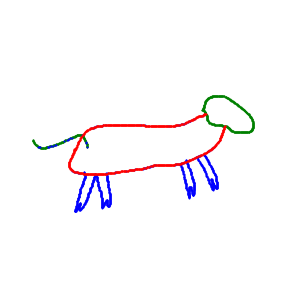

In [22]:
import random


fig = plt.figure(figsize=(5,5))
plt.xlim(0,800)
plt.ylim(800,0)

color = {
    0 : (0,64,128),
    1 : (64,128,0), 
    2: (64,128,128),
    3: (0,128,0),
}
color={0:'g',1:'b',2:'r',3:'y'}

for idx,lab in enumerate(np.unique(labs)):
    mask = labs == lab
    print(idx,lab, np.sum(mask))
    plt.scatter(pts[mask][:,0], pts[mask][:,1], s=1, c=(color[idx]))
plt.axis('off')
plt.savefig('test4.png')
plt.show()

In [24]:
img = cv2.imread('test4.png')
img.shape

(360, 360, 3)

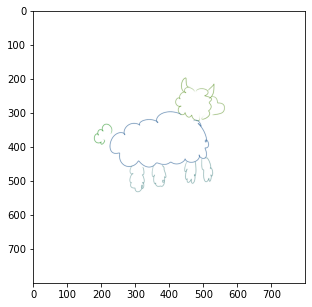

In [26]:
img = rd.get_img("/raid/xiaoyuz1/sketch_datasets/SketchSeg/sketch_label/fourleg/train/501.png")
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [2]:
# SlowSketch Dataset

f = open('/raid/xiaoyuz1/sketch_datasets/SlowSketch/Sketches.json')
data = json.load(f)

In [3]:
# QuickDraw dataset used for multi-graph transformer

import pickle
fname = "/raid/xiaoyuz1/sketch_datasets/multi_graph_data/tiny_train_dataset_dict.pickle"
fobj = pickle.load(open(fname, 'rb'))


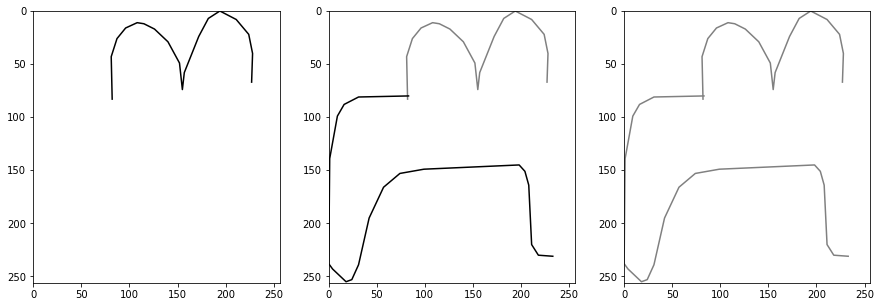

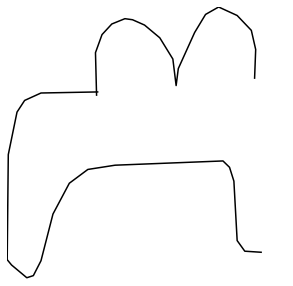

In [8]:
coord, pen_state, stroke_length = fobj['/home/peng/dataset/tiny_quickdraw_coordinate/train/camel/camel_15.npy']
rd.draw_per_stroke(rd.transform_multigraph_2_quickdraw(coord, pen_state))

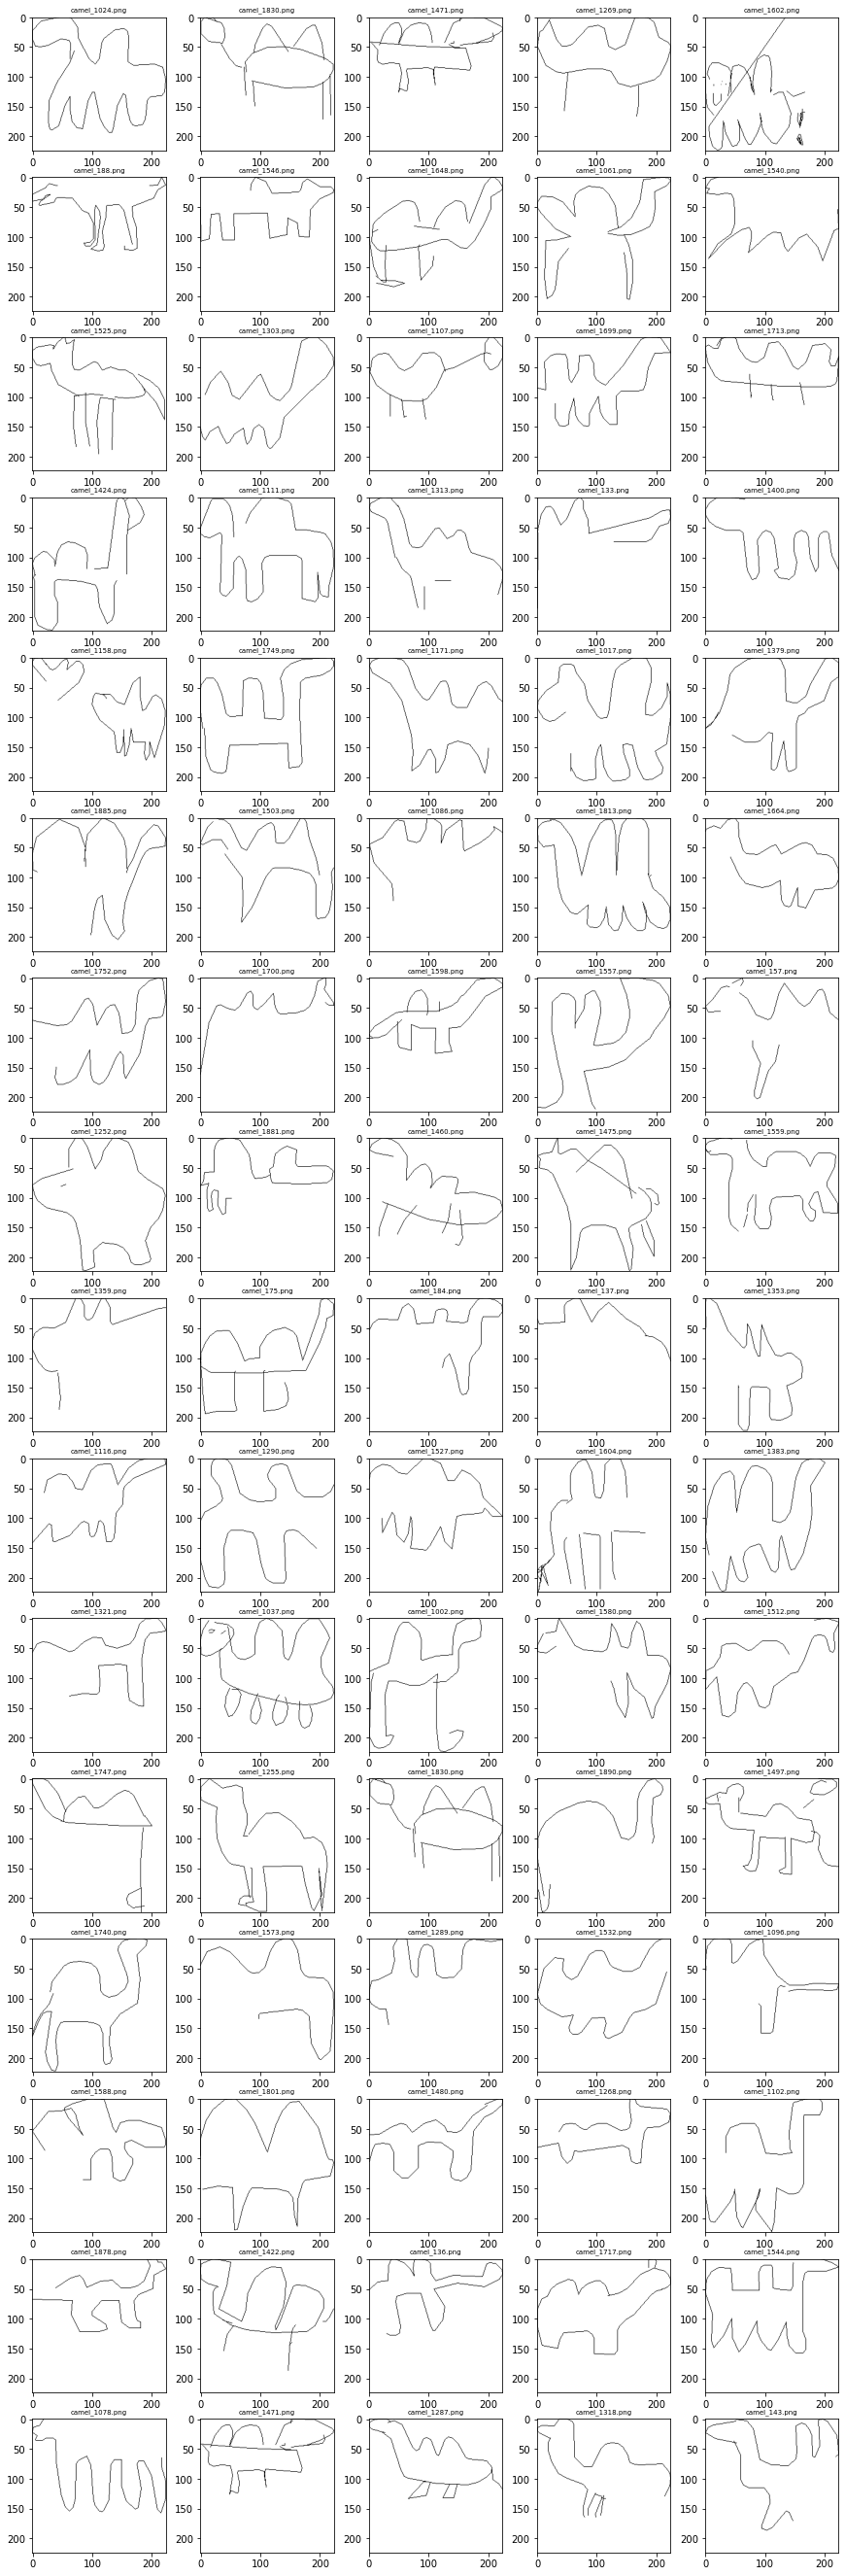

In [2]:
folder = "/raid/xiaoyuz1/sketch_datasets/data_4_cnnbaselines/tiny_train_set/camel"
total_sketches = len(os.listdir(folder))
sketch_chosen = np.random.choice(os.listdir(folder), 80)
img_paths = [os.path.join(folder, p) for p in sketch_chosen]

rd.show_images(img_paths, sketch_chosen, flip=True)

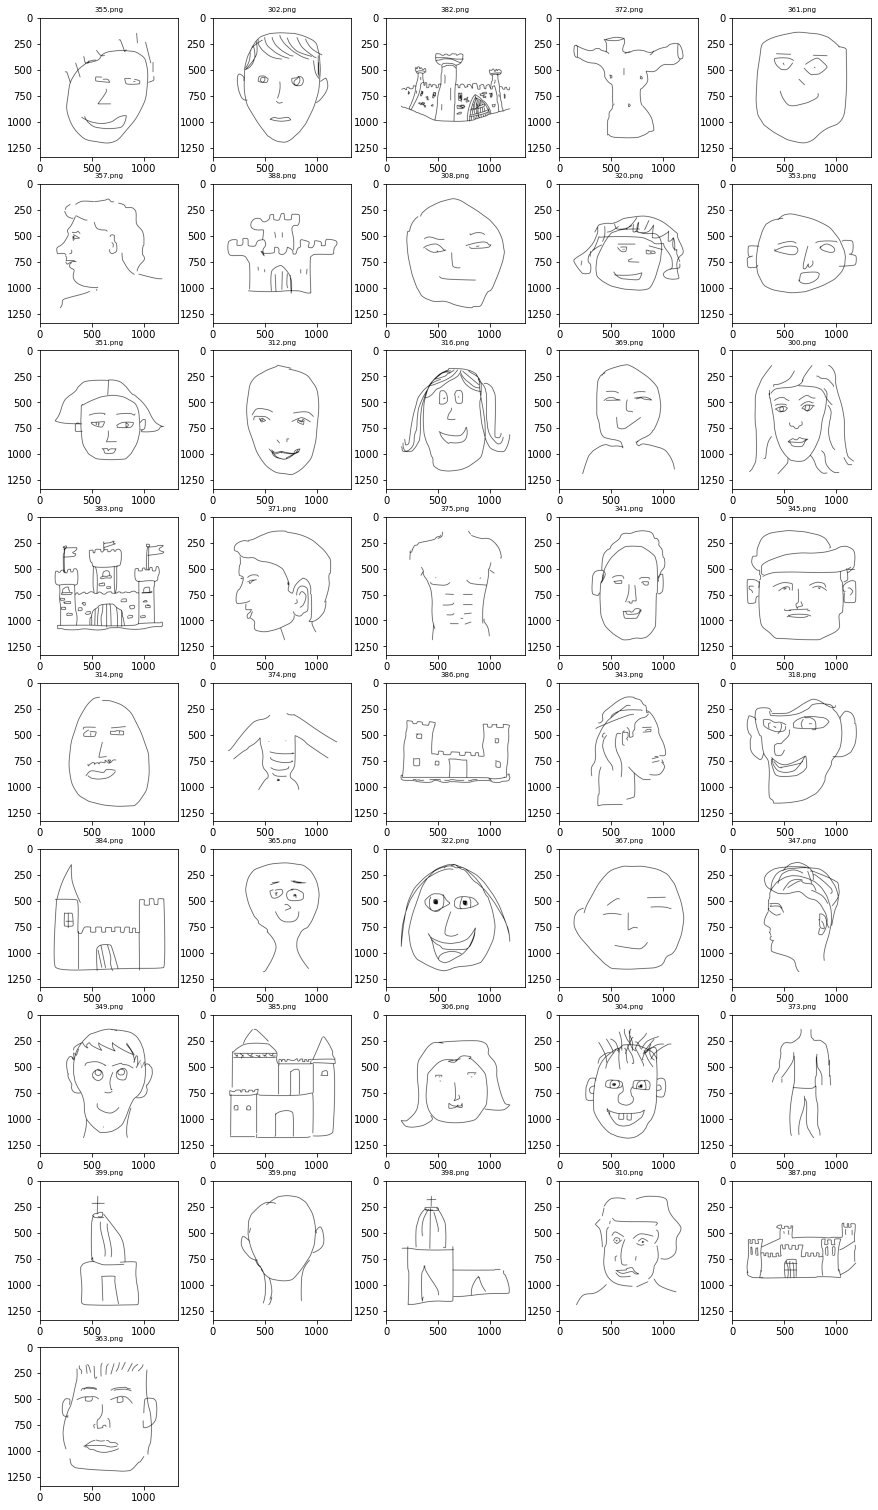

In [3]:
tub_folder = "/raid/xiaoyuz1/sketch_datasets/TU_Berlin/shape_retrieval/train/png/3"
img_paths = []
for fdr in os.listdir(tub_folder):
    fdr_full = os.path.join(tub_folder, fdr)
    for imgp in os.listdir(fdr_full):
        img_path = os.path.join(fdr_full, imgp)
        img_paths.append(img_path)

rd.show_images(img_paths, [img_path.split("/")[-1] for img_path in img_paths])

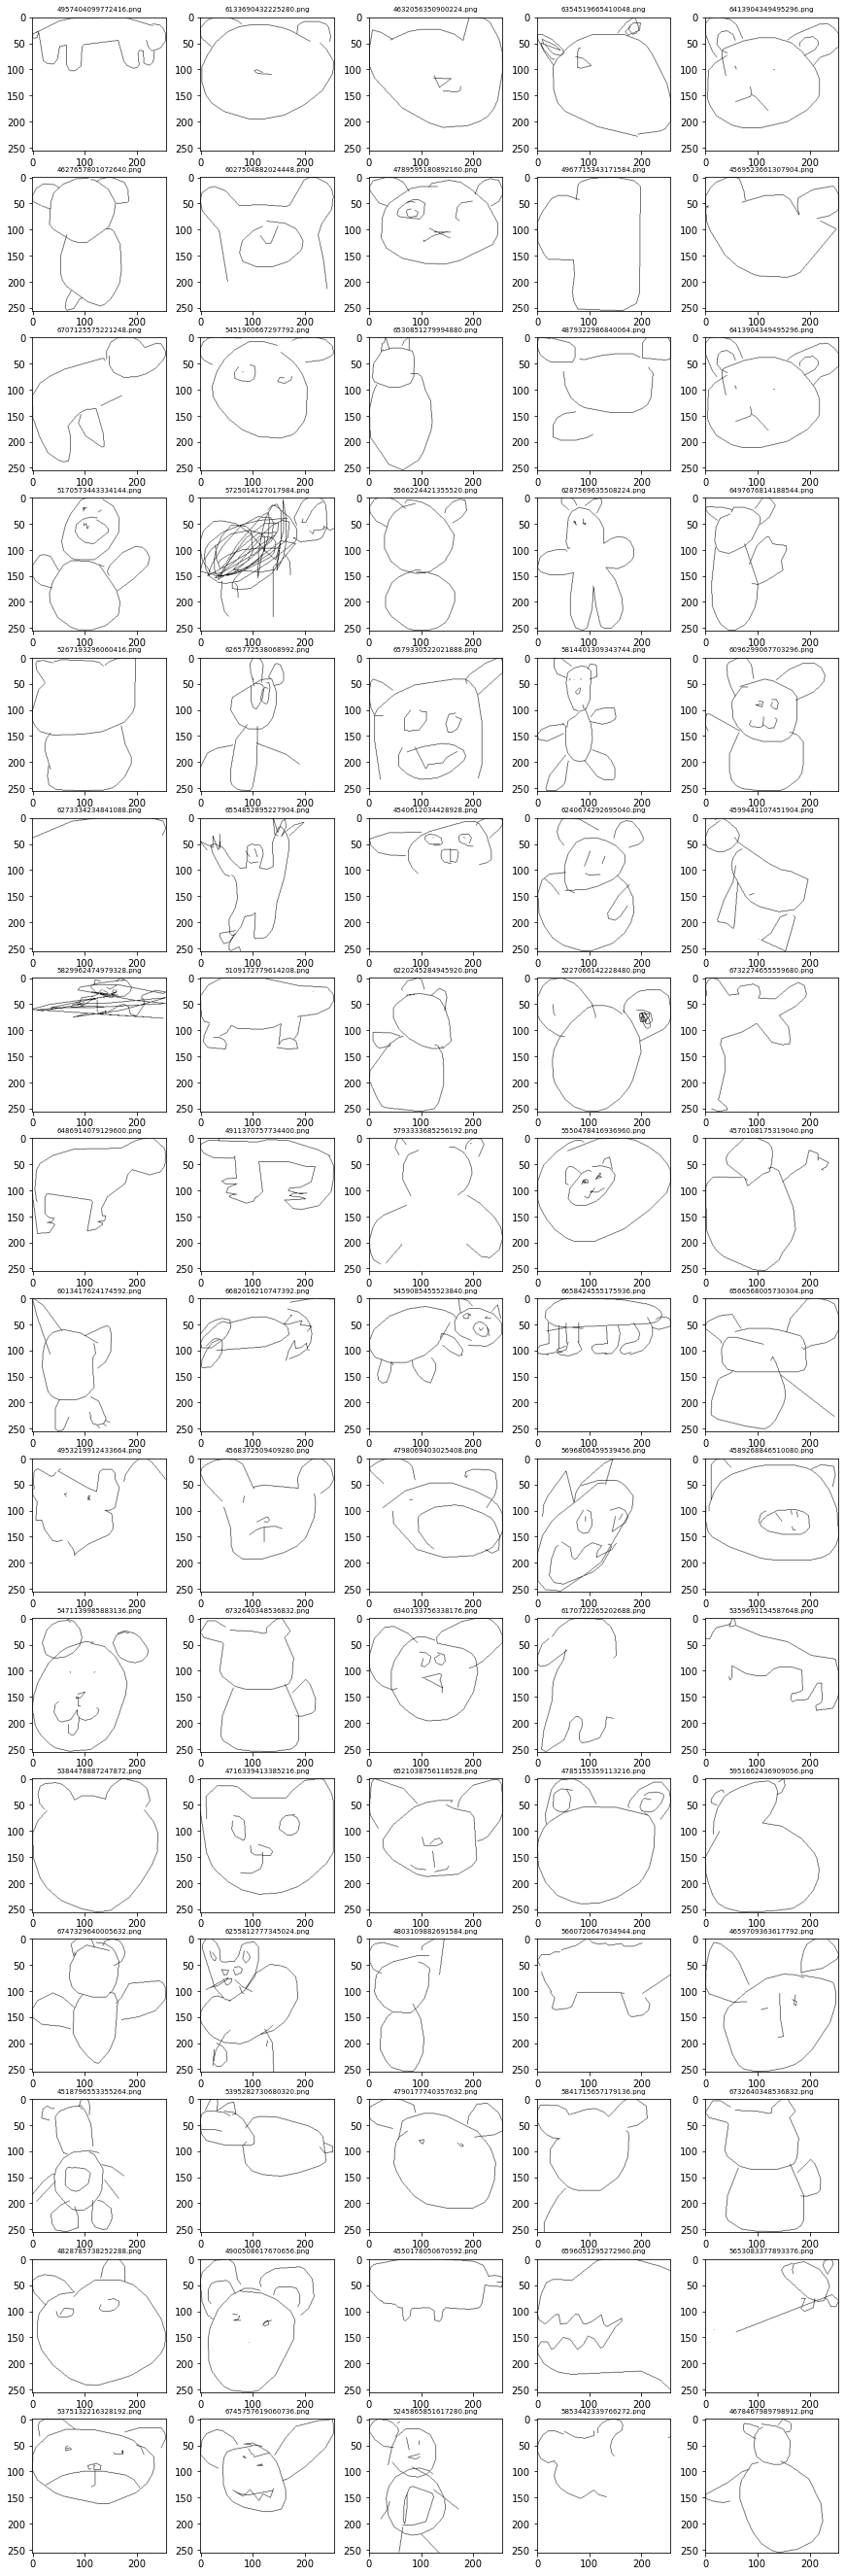

In [12]:
# QuickDraw Extended
folder = "/raid/xiaoyuz1/sketch_datasets/QuickDraw_sketches_final/bear"
total_sketches = len(os.listdir(folder))
sketch_chosen = np.random.choice(os.listdir(folder), 80)
img_paths = [os.path.join(folder, p) for p in sketch_chosen]

show_images(img_paths, sketch_chosen)

In [3]:
s = ""
for p in os.listdir("/raid/xiaoyuz1/sketch_datasets/QuickDraw_sketches_final"):
    s += ", " + p
print(s[2:])

mouse, shoe, candle, apple, dolphin, cactus, bat, rabbit, wine bottle, eiffel tower, chair, lighthouse, dog, kangaroo, palm tree, violin, umbrella, duck, snake, pineapple, bench, couch, eyeglasses, motorcycle, skyscraper, cup, bee, saxophone, banana, fish, spider, cruise ship, hedgehog, sink, penguin, castle, owl, fire_hydrant, train, church, mountain, guitar, map, bicycle, saw, elephant, sea_turtle, lobster, soccer ball, snail, alarm_clock, lion, axe, feather, hamburger, parrot, chandelier, frog, skateboard, megaphone, tree, sheep, scissors, sailboat, ant, helicopter, bread, cake, pizza, crocodilian, butterfly, teapot, door, cow, pig, hammer, giraffe, campfire, moon, rifle, hat, airplane, flower, beach, bandage, horse, scorpion, knife, pickup_truck, spoon, cat, camel, monkey, squirrel, mushroom, zebra, fan, raccoon, shark, teddy_bear, tiger, swan, bus, car, rhinoceros, windmill, hurricane, crab, hot-air_balloon, bear


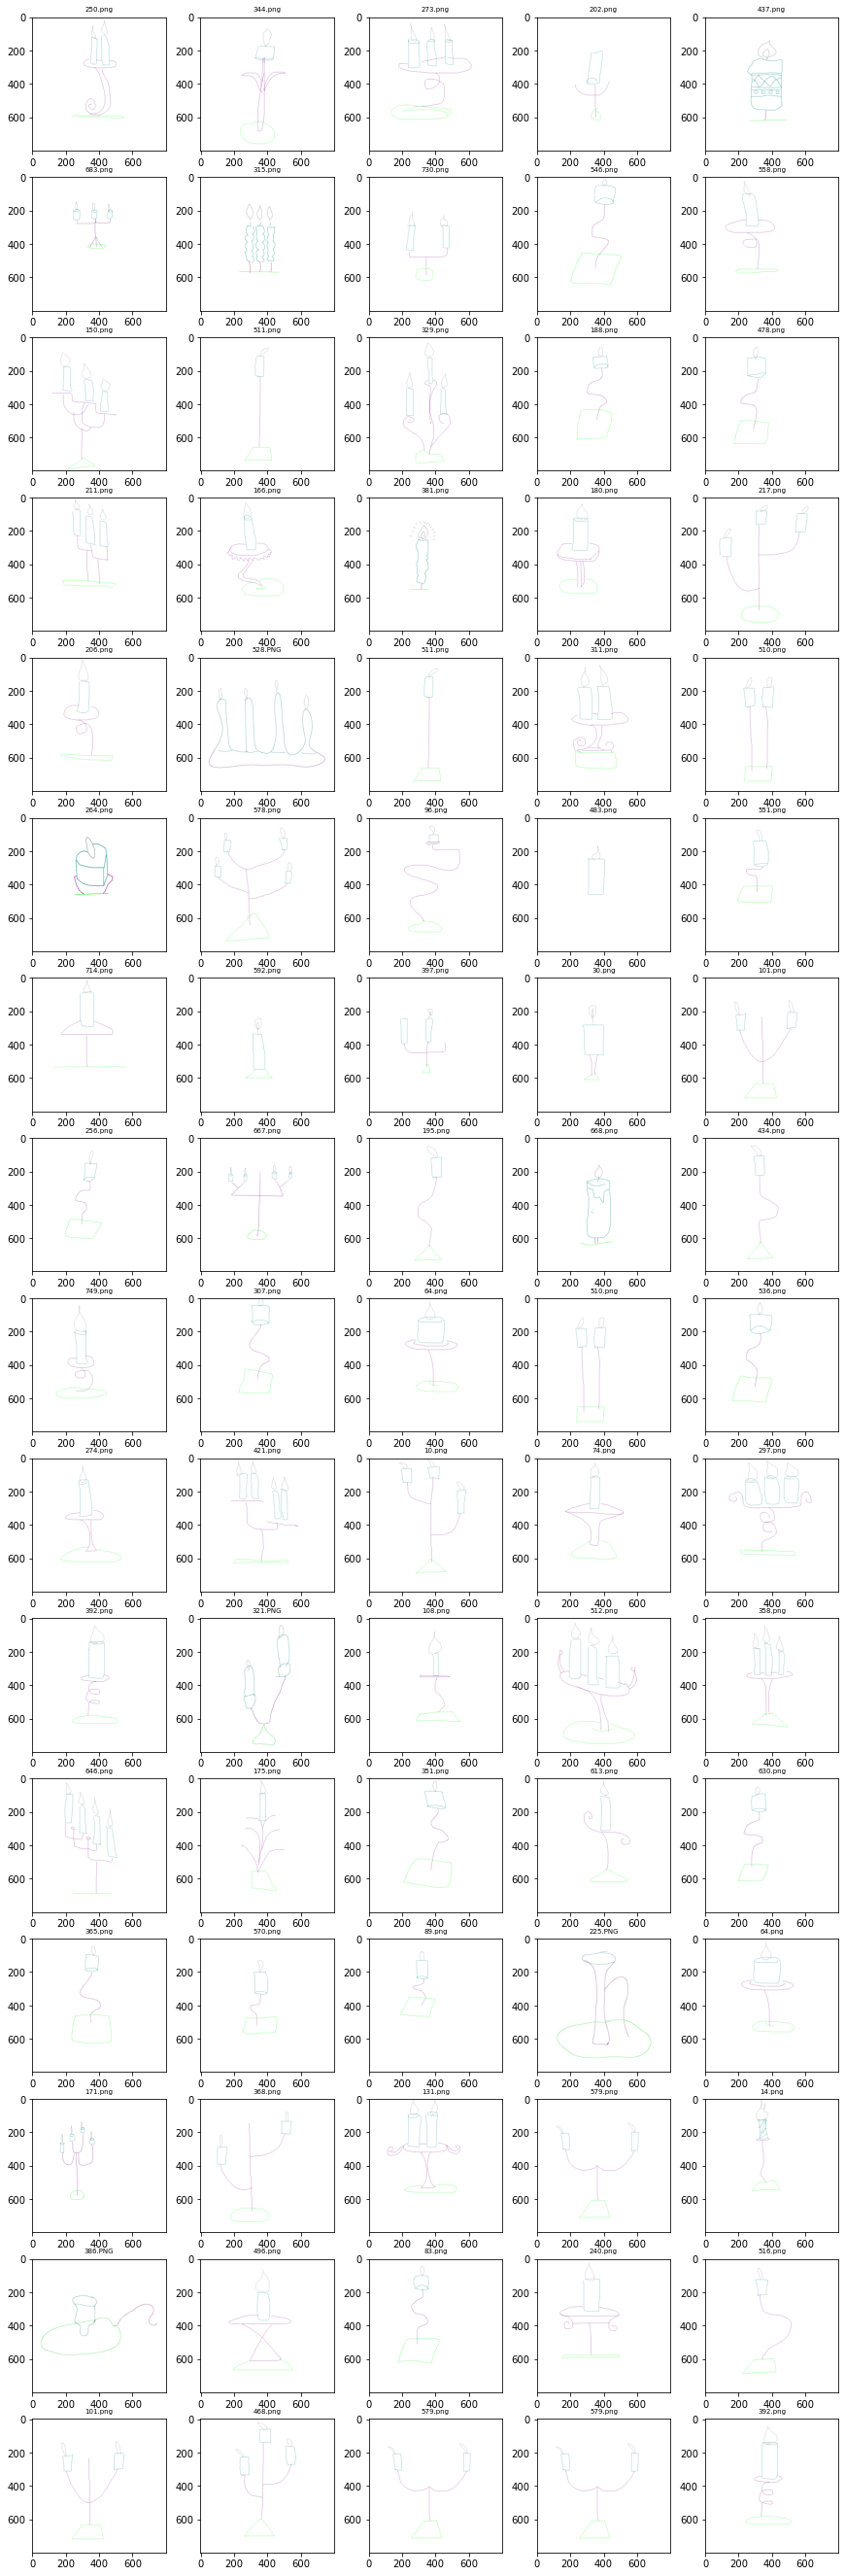

In [81]:
folder = "/raid/xiaoyuz1/sketch_datasets/SketchSeg/sketch_label/candelabra/train"
total_sketches = len(os.listdir(folder))
sketch_chosen = np.random.choice(os.listdir(folder), 80)
img_paths = [os.path.join(folder, p) for p in sketch_chosen]

rd.show_images(img_paths, sketch_chosen)

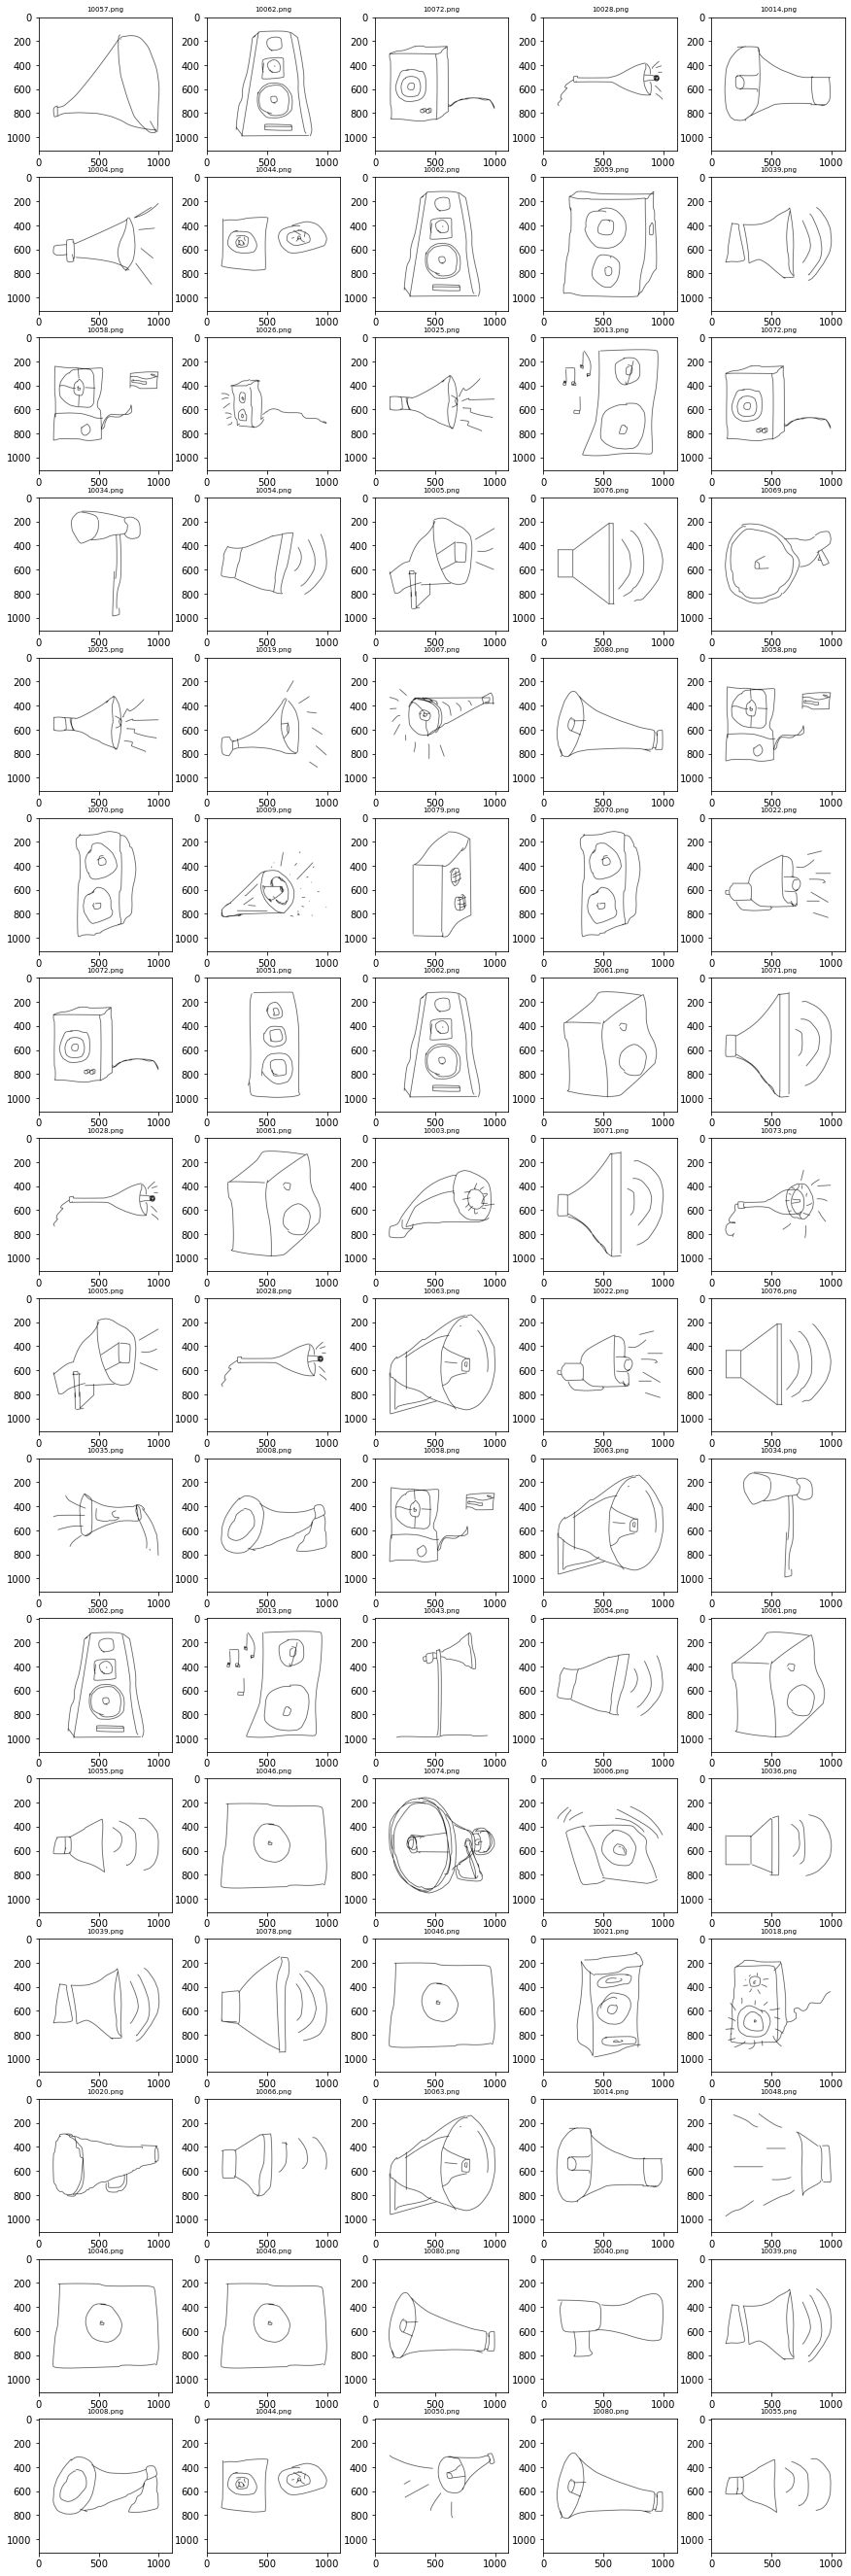

In [3]:
folder = "/raid/xiaoyuz1/sketch_datasets/tuberlin/png/loudspeaker"
total_sketches = len(os.listdir(folder))
sketch_chosen = np.random.choice(os.listdir(folder), 80)
img_paths = [os.path.join(folder, p) for p in sketch_chosen]

rd.show_images(img_paths, sketch_chosen)

In [ ]:
# What categories are available?

